# Sample testing of model performance using different polynomial degrees

In [27]:
import pandas as pd
import statsmodels.api as sm

## 1.) Import Data from FRED

In [28]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [29]:
data.index = pd.to_datetime(data.index)
data.dropna(inplace=True)

In [30]:
data.index = pd.to_datetime(data.index)

## 2.) Split data into Train, Test Holdout

In [31]:
split_1 = int(len(data)*.6)
split_2 = int(len(data)*.9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2:]

In [32]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [33]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out = sm.add_constant(X_out)
X_hold = sm.add_constant(X_hold)

## 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [34]:
model1 = sm.OLS(y_in, X_in).fit()

## 4.) Model performmance

In [35]:
import matplotlib.pyplot as plt

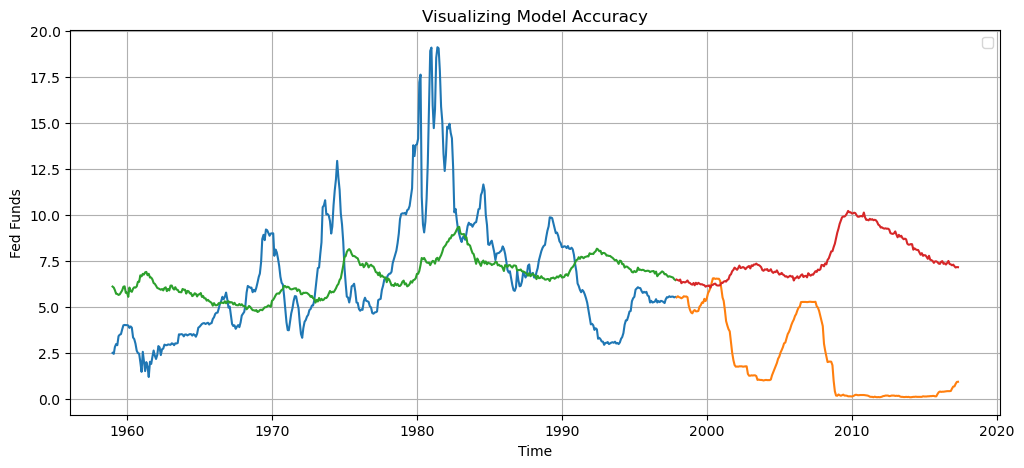

In [36]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))

###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend([])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

## 5.) What are the in/out of sample MSEs

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
in_mse_1 = mean_squared_error(y_in, model1.predict(X_in))
out_mse_1 = mean_squared_error(y_out, model1.predict(X_out))

In [39]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168641
Outsample MSE :  40.36082783566852


## 6.) Repeat 3,4,5 for polynomial degrees 1,2,3 using a for loop

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
degrees = 2

In [42]:
poly = PolynomialFeatures(degree=degrees)
X_in_poly = poly.fit_transform(X_in)
X_out_poly = poly.fit_transform(X_out)

In [43]:
max_degrees = 3

DEGREES:  1


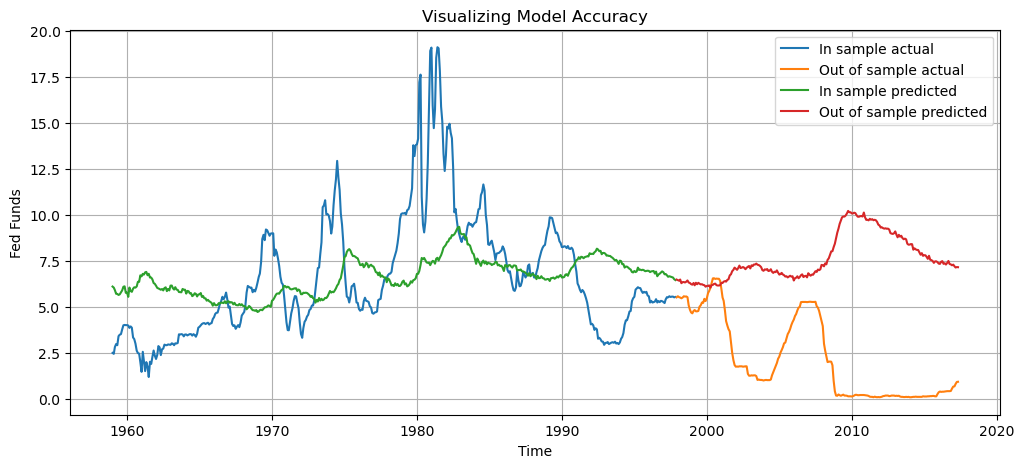

DEGREES:  2


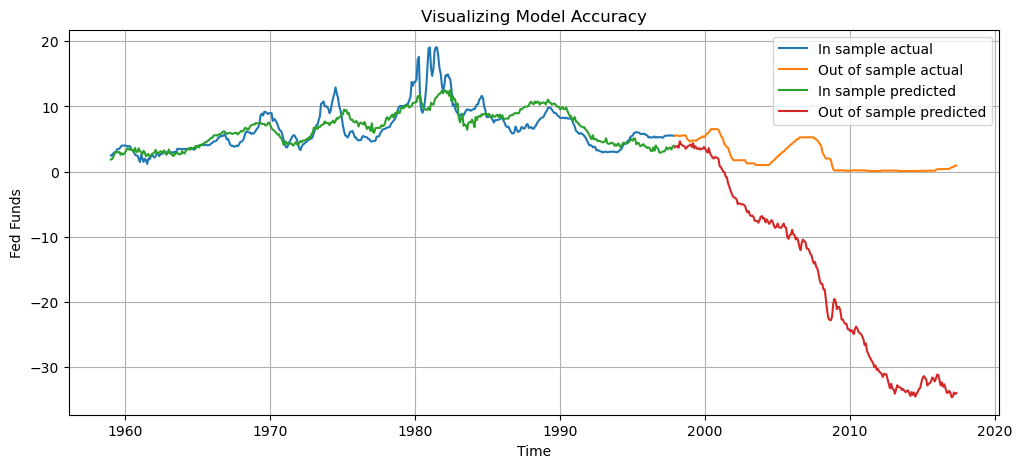

DEGREES:  3


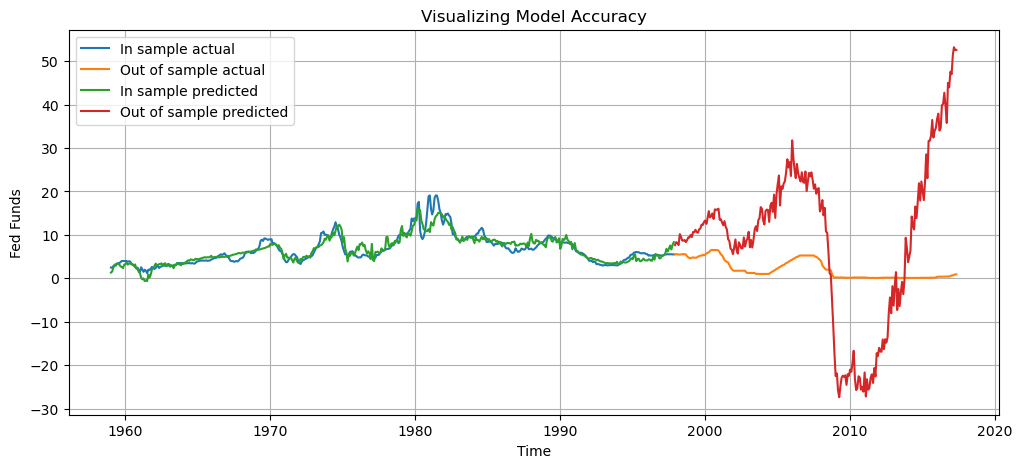

Insample MSE :  1.8723636271946136
Outsample MSE :  371.76618900618945


In [44]:
for degrees in range (1,1+max_degrees):
    print("DEGREES: ", degrees)
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.transform(X_out)
    model1 = sm.OLS(y_in, X_in_poly).fit()
    plt.figure(figsize = (12,5))
    in_preds = model1.predict(X_in_poly)
    in_preds = pd.DataFrame(in_preds,index=y_in.index)
    out_preds = model1.predict(X_out_poly)
    out_preds = pd.DataFrame(out_preds, index=y_out.index)
    plt.plot(y_in)
    plt.plot(y_out)
    plt.plot(in_preds)
    plt.plot(out_preds)
    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend(["In sample actual","Out of sample actual","In sample predicted","Out of sample predicted"])
    plt.grid()
    plt.show()
    
in_mse_1 = mean_squared_error(y_in, model1.predict(X_in_poly))
out_mse_1 = mean_squared_error(y_out, model1.predict(X_out_poly))
print("Insample MSE : ", in_mse_1 )
print("Outsample MSE : ", out_mse_1 )

## 7.) Observations

As we go on increasing the degree of the linear regression, there is tradeoff between Bias and
Variance.
In the case of a first-degree model, we observe high bias as the in-data predictions do not closely
follow the actual values, supported by the relatively high in-sample RMSE. This indicates an
oversimplified model that fails to capture the complexity of the underlying patterns in the data.
We also observe a low variance in the out-value predicted values. This is a case of under-fitting
where the model is too simplistic to represent the underlying relationships in the data adequately.
In second degree model, we notice a significant improvement in the in-sample predictions. The
model now captures the general trends and movements of the actual data more effectively, resulting
in a closer alignment between predictions and actual values within the training dataset. Looking at
the predictions for the out-data, we see a consistent trend line, althought it doesnt match with the
actual out-data values.Model 2 shows a lower in-sample RMSE compared to Model 1, indicating a
reduction in bias. However, the substantial increase in out-of-sample RMSE suggests a significant
rise in variance, signifying potential overfitting to the training data. This indicates a slightly
increased variance, signifying that while the model has improved in capturing complexity, it may
not generalize well to new, unseen data
In the third degree model, we observe in-sample predictions that almost perfectly overlay the actual
in-sample values. The model exhibits a high degree of flexibility, accommodating the intricacies of
the training data with great precision. However, out-of-sample predictions become highly volatile
and sensitive to even minor fluctuations in the data. Model 3 displays further reductions in both
in-sample and out-of-sample RMSE compared to Model 2. The low in-sample RMSE suggests a
model that fits the training data well, potentially capturing underlying patterns. However, the
relatively high out-of-sample RMSE indicates a moderate level of variance. This is a case of the
over-fitting, it fails to generalize well to new data, leading to a decline in predictive accuracy